In [44]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from sklearn.cluster import KMeans

### Find location of centre of optic disc

1


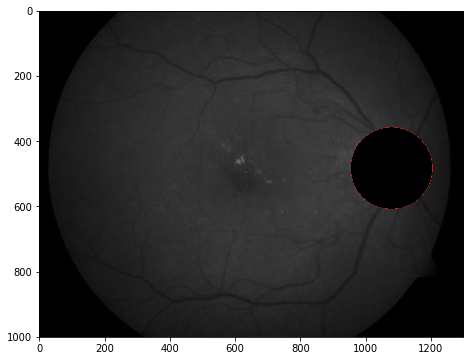

1078 483


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data, color
from skimage.io import imread, imshow
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import cv2

# Load picture and detect edges
im = imread('ODmasked-image-274.png')
image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(100, 200, 5)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)
print(len(radii))
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 6))
imagea = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    imagea[circy, circx] = (220, 20, 20)

ax.imshow(imagea, cmap=plt.cm.gray)
plt.show()
print(center_x, center_y)

C:\Users\Alex\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


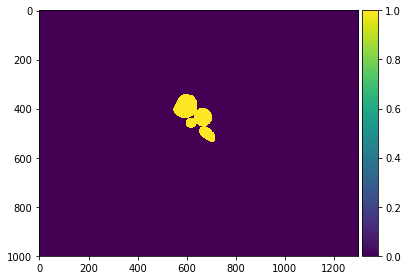

In [4]:
import matplotlib.pyplot as plt
imGT = imread('resized-image-274.png')
imGTGrey = cv2.cvtColor(imGT, cv2.COLOR_BGR2GRAY)
#imshow(imGTGrey)

# topGroup = 
#print(len(imGTGrey[imGTGrey >= 100]))
imGTGrey[imGTGrey < 225 ] = 0
imGTGrey[imGTGrey >= 225] = 1
imshow(imGTGrey)



In [5]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
import csv
position = 0 #left

img_ent = entropy(image, disk(5))


if center_x >= 650:
    position = 1 #right

pixelDicts = []
distances = np.zeros(image.shape[0:2])
for x in range(distances.shape[0]):
    for y in range(distances.shape[1]):
        distance = np.sqrt((x-center_x)**2+(y-center_y)**2)
        pixelDict = {'x':x,'y':y, #coordinates, not used in classification, just for matching up with ground truths
                     'r':im[x,y][0],'g':im[x,y][1],'b':im[x,y][2], #rgb values
                     "Left/Right (0/1)": position,
                     'Distance From Disc':distance, 'Entropy':img_ent[x,y],
                     'Exudate Pixel': imGTGrey[x,y] }
        pixelDicts.append(pixelDict)
keys = pixelDicts[0].keys()
with open('image274.csv', 'w',newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(pixelDicts)

In [7]:
#Feature Functions
def subsection(image,start_y,start_x,dimension_y,dimension_x):
    s_image = image[start_y:(start_y+dimension_y),start_x:(start_x+dimension_x)]
    imshow(s_image)
    
    
    return s_image
def leftRight(x_pixel):
    if x_pixel <= 650:
        return 1
    else:
        return 0
    

# def distances(greyimage, y_center, x_center):
#     distances = np.zeros(greyimage.shape)
#     for y in range(distances.shape[0]):
#         for x in range(distances.shape[1]):
#             distances[y,x] = np.sqrt((y-y_center)**2+(x-x_center)**2) 
#     return np.amin(distances), np.amax(distances),np.mean(distances) 
    
    

def get_entropy(greyimage): #takes 2D numpy array
    return entropy(greyimage)

def dominant_pixels(image): #image must be coloured image
    rd_pixels = 0
    gd_pixels = 0
    bd_pixels = 0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if (image[y,x][0] > 225 and image[y,x][1] < 75 and image[y,x][2] < 75):
                rd_pixels += 1
            if (image[y,x][1] > 200 and image[y,x][0] < 100 and image[y,x][2] < 100):
                gd_pixels += 1
            if (image[y,x][2] > 225 and image[y,x][0] < 100 and image[y,x][1] < 100):
                bd_pixels += 1
    return rd_pixels, gd_pixels, bd_pixels
                

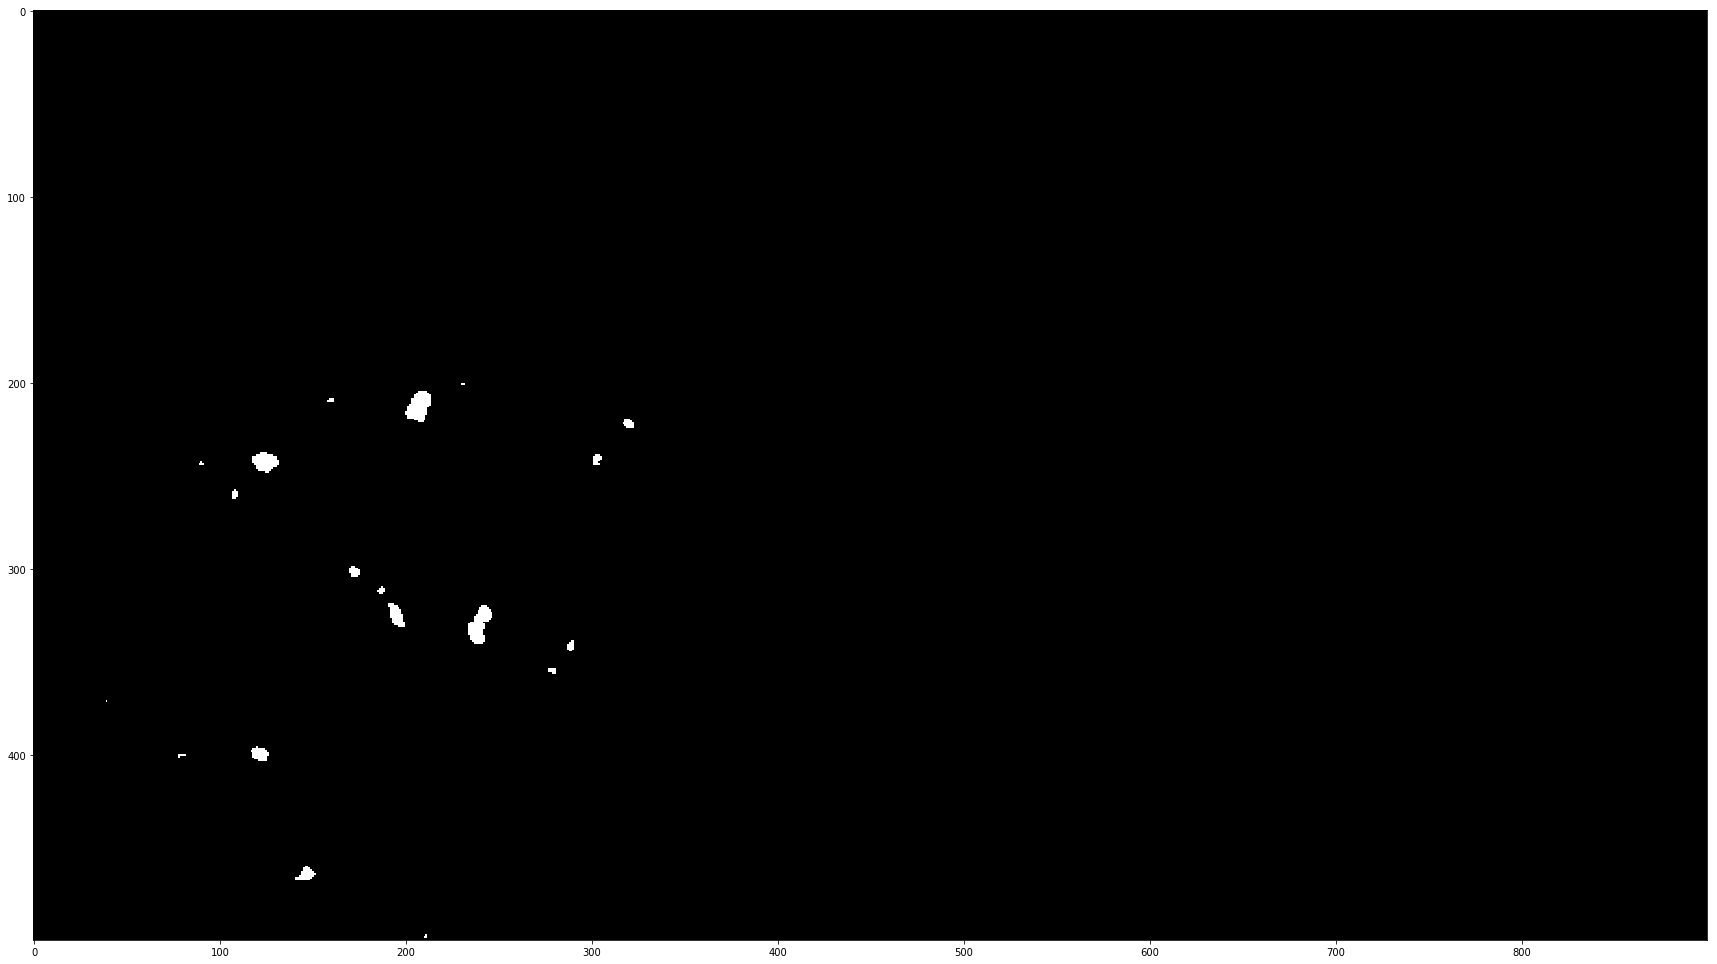

In [8]:
import collections
from statistics import mean
im289 = imread('C:/Users/Alex/Dropbox/MEng Software/Winter-Term-2019/Big Data/Project/clusters-cropped/cluster-ODmasked-image-298.png')
#print(np.size(np.where(im289 == 100)))
#print(collections.Counter(im289))



#check if cluster has <10000 pixels if it does -> exudates
def exudate_image(image,max_pixels):
    cluster_values = np.unique(image)
    pixel_values = []
    for cv in cluster_values:
        amount = np.size(np.where(image == cv))
        if amount < max_pixels:
            pixel_values.append(cv)
    if len(pixel_values) > 0:
        pv = min(pixel_values)
        image[np.where(image != pv)] = 0
        image[np.where(image == pv)] = 255
    else:
        image[:,:] = 0
    return image

def count_exudates(image):
    count = np.size(np.where(image == 255))
    return count

def distances(image, center_y, center_x):
    min_dist = 0
    max_dist = 0
    avg_dist = 0
        
    rows,columns = np.where(image == 255)
    if len(rows) > 0:
        distances = []
        locations = zip(rows,columns)
        for l in locations:
            y = l[0]
            x = l[1]
            dist = np.sqrt((y-center_y)**2+(x-center_x)**2)
            distances.append(dist)
        min_dist = min(distances)
        max_dist = max(distances)
        avg_dist = mean(distances)
    
    return min_dist, max_dist, avg_dist
        
im289 = exudate_image(im289,10000)
count = count_exudates(im289)
distances(im289,1,1)
min_dist, max_dist, avg_dist = distances(im289,498,211)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30, 20))
ax.imshow(im289, cmap=plt.cm.gray)
plt.show()
#imshow(im289)

### Load Subsection Dimensions

1
(500, 900)
(500, 900, 3)
9604
2
(500, 900)
(500, 900, 3)
0
3
(500, 900)
(500, 900, 3)
0
4
5
6
7
8
9
10
11
12
13
14
(500, 900)
(500, 900, 3)
0
15
16
17
18
19
20
21
22
23
24
25
(500, 900)
(500, 900, 3)
0
26
27
28
29
30
31
32
33
34
35
36
(500, 900)
(500, 900, 3)
0
37
38
39
40
41
42
43
44
45
46
47
(500, 900)
(500, 900, 3)
0
48
49
50
51
52
53
54
55
56
57
58
(500, 900)
(500, 900, 3)
0
59
60
61
62
63
64
65
66
67
68
69
(500, 900)
(500, 900, 3)
0
70
71
72
73
74
75
76
77
78
79
80
(500, 900)
(500, 900, 3)
0
81
82
83
84
85
86
87
88
89
90
91
(500, 896)
(500, 896, 3)
9546
92
93
94
95
96
97
98
99
100
101
102
(500, 900)
(500, 900, 3)
3028
103
104
105
106
107
108
109
110
111
112
113
(500, 900)
(500, 900, 3)
5698
114
(500, 900)
(500, 900, 3)
4106
115
116
117
118
119
120
121
122
123
124
125
(500, 900)
(500, 900, 3)
0
126
127
128
129
130
131
132
133
134
135
136
(500, 900)
(500, 900, 3)
9972
137
138
139
140
141
142
143
144
145
146
147
(500, 900)
(500, 900, 3)
2534
148
149
150
151
152
153
154
155
156
157


6
1061
(500, 900)
(500, 900, 3)
0
1062
1063
(500, 900)
(500, 900, 3)
48
1064
(500, 845)
(500, 845, 3)
50
1065
(500, 900)
(500, 900, 3)
0
1066
(500, 900)
(500, 900, 3)
0
1067
(500, 900)
(500, 900, 3)
0
1068
(500, 900)
(500, 900, 3)
4842
1069
(500, 900)
(500, 900, 3)
0
1070
(500, 900)
(500, 900, 3)
0
1071
(500, 900)
(500, 900, 3)
0
1072
(500, 900)
(500, 900, 3)
0
1073
1074
(500, 900)
(500, 900, 3)
0
1075
(500, 860)
(500, 860, 3)
0
1076
(500, 900)
(500, 900, 3)
0
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183


434
1437
(500, 900)
(500, 900, 3)
808
1438
(500, 900)
(500, 900, 3)
1782
1439
1440
(500, 812)
(500, 812, 3)
322
1441
(500, 900)
(500, 900, 3)
1934
1442
(500, 900)
(500, 900, 3)
704
1443
(500, 900)
(500, 900, 3)
882
1444
(500, 900)
(500, 900, 3)
808
1445
(500, 900)
(500, 900, 3)
1188
1446
(500, 900)
(500, 900, 3)
3952
1447
(500, 850)
(500, 850, 3)
1372
1448
(500, 886)
(500, 886, 3)
2744
1449
(500, 900)
(500, 900, 3)
754
1450
1451
1452
(500, 821)
(500, 821, 3)
532
1453
(500, 806)
(500, 806, 3)
678
1454
(500, 900)
(500, 900, 3)
738
1455
(500, 806)
(500, 806, 3)
838
1456
(500, 900)
(500, 900, 3)
1766
1457
(500, 828)
(500, 828, 3)
882
1458
(500, 900)
(500, 900, 3)
1576
1459
(500, 900)
(500, 900, 3)
634
1460
(500, 900)
(500, 900, 3)
1460
1461
(500, 809)
(500, 809, 3)
190
1462
1463
(500, 900)
(500, 900, 3)
1052
1464
(500, 900)
(500, 900, 3)
764
1465
(500, 900)
(500, 900, 3)
926
1466
(500, 814)
(500, 814, 3)
5074
1467
(500, 900)
(500, 900, 3)
2690
1468
(500, 900)
(500, 900, 3)
2098
1469
(500, 

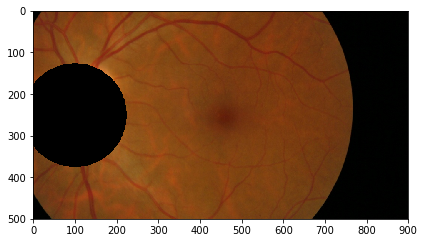

In [55]:
import csv
import os
from sklearn.metrics.cluster import entropy
with open('ImageSubsections.csv') as csvfile:
    reader = csv.DictReader(csvfile)
#     with open('OutputFile.csv','w',newline = '') as outFile:
#         writer = csv.DictWriter(outFile)
    feature_dicts = []
    count = 1
    for row in reader:
        print(count)
        count +=1
        imageName = row['image']
        start_x  = int(row['start_x'])
        start_y  = int(row['start_y'])
        center_x = int(row['x'])
        center_y = int(row['y'])
        DR       = row['exudates'] 
        fileLocation = 'C:/Users/Alex/Dropbox/MEng Software/Winter-Term-2019/Big Data/Project/masked images (1)/' +imageName
        
        cluster_file = 'C:/Users/Alex/Dropbox/MEng Software/Winter-Term-2019/Big Data/Project/clusters-cropped/cluster-' +imageName
        exists = os.path.isfile(cluster_file)
        if exists:
            im = imread(fileLocation)

            imgrey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

            #dimension of subsection
            dimension_x = 900 #dimension of subsection
            dimension_y = 500 #dimension of subsection
            if start_x > 500:
                start_x -= 400
            imgrey_sub = subsection(imgrey,start_y,start_x,dimension_y,dimension_x)
            im_sub = subsection(im,start_y,start_x,dimension_y,dimension_x)
            new_center_x = center_x - start_x
            new_center_y = center_y - start_y

            #Features
            en = entropy(imgrey_sub) #feature
            l_r = leftRight(center_x) #feature

            clusterim = imread(cluster_file)
            exudateim = exudate_image(clusterim,10000)
            exudate_count = count_exudates(exudateim) #feature
            print(exudate_count)
            min_dist, max_dist, avg_dist = distances(exudateim,new_center_x,new_center_y) #3x features
            features = {'image':imageName, 'entropy':en,'left/right (1/0)':l_r,'number of exudate pixels':exudate_count,
                        'min distance from od centre':min_dist,'max distance from od centre':max_dist,
                        'average distance from od centre':avg_dist,'DR':DR}
            feature_dicts.append(features)

keys = feature_dicts[0].keys()
with open('features.csv', 'w',newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(feature_dicts)
        
            
            
            

C:\Users\Alex\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


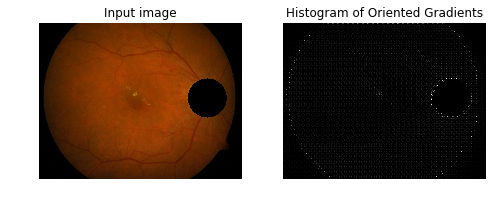

In [50]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


# image = data.astronaut()
image = im
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
print(hog_image)
plt.show()

In [12]:
print(len(fd),hog_image.shape)

40176 (1000, 1300)


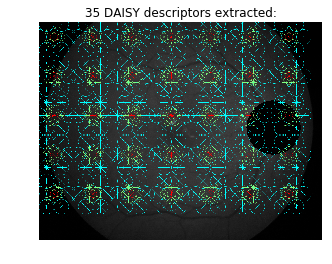

In [51]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt

im = imread('ODmasked-image-274.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

descs, descs_img = daisy(img, step=180, radius=68, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [36]:
print(descs.shape)
print(descs_img.shape)

(5, 7, 104)
(1000, 1300, 3)


In [52]:
from cv2 import xfeatures2d#FeatureDetector_create
dense=cv2.xfeatures2d.SIFT_create("Dense")#cv2.FeatureDetector_create("Dense")
kp=dense.detect(img)
kp,des=sift.compute(img,kp)

ImportError: cannot import name 'xfeatures2d' from 'cv2.cv2' (C:\Users\Alex\Anaconda3\lib\site-packages\cv2\cv2.cp37-win_amd64.pyd)

In [54]:
import cv2
import numpy as np
#img = cv2.imread('home.jpg')
gray= img#cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp)
cv2.imwrite('sift_keypoints.jpg',img)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'